In [46]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA



In [11]:
airp = pd.read_csv(r"D:\DAIAugust2025\ML\250840128012_PML\AirPassengers.csv", index_col=0)
airp.shape

(144, 1)

In [60]:
y = airp['#Passengers']
y_train = airp['#Passengers'].iloc[:-12]
y_test = airp['#Passengers'].iloc[-12:]

(12,)

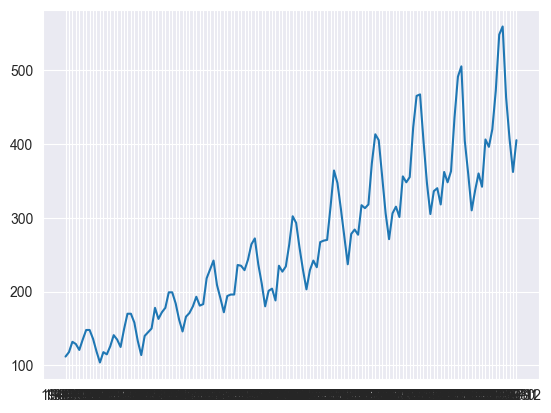

In [57]:
plt.plot(y_train)

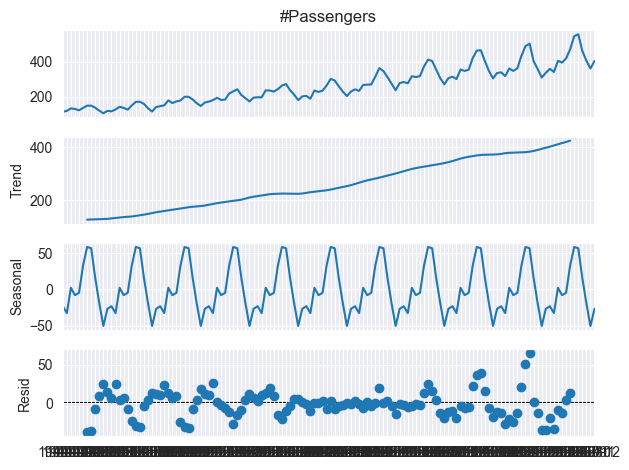

In [17]:

series = y_train
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

In [40]:
res = adfuller(airp['#Passengers'], maxlag=10)
p_value = res[1]
if p_value < 0.05:
    print("stationary")
else:
    print("Not stationary")

Not stationary


In [41]:
ord_1_diff = y.diff()
ord_1_diff = ord_1_diff.dropna()

res = adfuller(ord_1_diff, maxlag=10)
p_value = res[1]
if p_value < 0.05:
    print('stationary ->', p_value)
else:
    print('Not stationary ->', p_value)


stationary -> 8.674876853271811e-29


### reqd diff order is 1

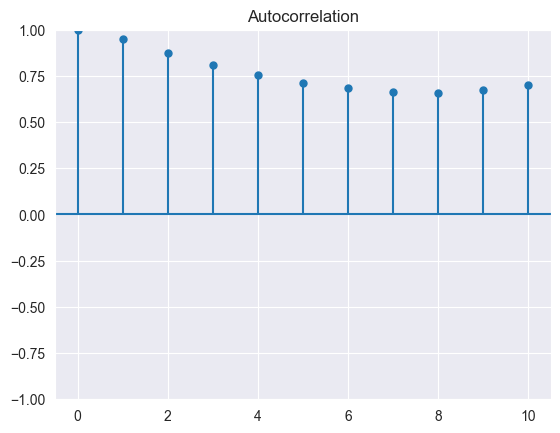

In [42]:
plot_acf(y, lags=10, alpha=None)
plt.show()

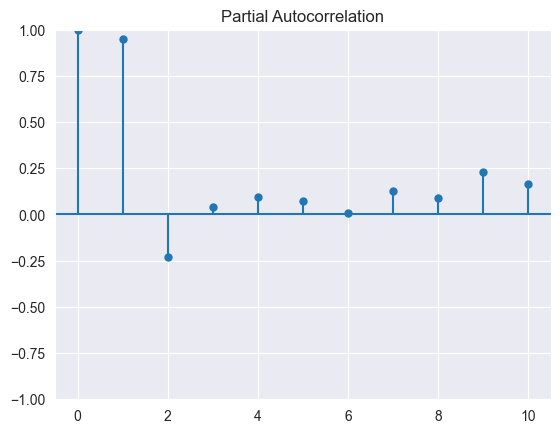

In [44]:
plot_pacf(y, lags=10, alpha=None)
plt.show()

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


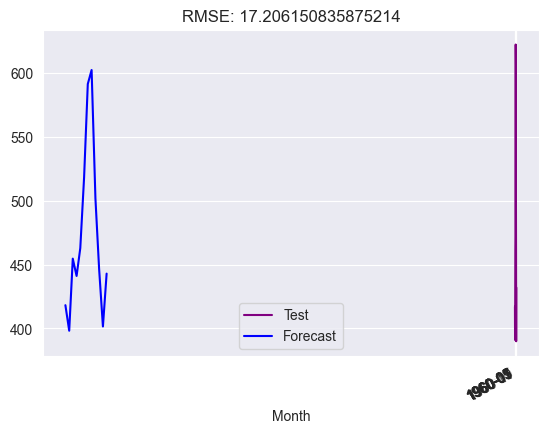

In [58]:
model = ARIMA(y_train,  order=(2,1,2), seasonal_order=(1,1,1,12))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
y_test.plot(color='purple', label='Test')
predictions.plot(color='blue', label='Forecast')
rmse = root_mean_squared_error(y_test, predictions)
plt.title(f"RMSE: {rmse}")
plt.legend()
plt.show()